In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_unweighted, venn3_unweighted

## Configuration for datasets

- Spark executed on CloudSpeller groupOrtho1.txt file, with different tree syntax.
- settings

```
-p 1
--alphabet 2
--degen 2
--min_len 8
--max_len 9
```

- CloudSpeller executed on groupOrtho1.txt using settings:

```
sMotifAlgorithm_Type=EXACT
sIndex_Structure=GST
sNode_Decoration_Type=BITS
sConservationScore=BLS
sBLS_Thresholds=15,50,60,70,90,95
iKmin=8
iKmax=8
iMax_Degenerate_Positions=2
sMotif_Alphabet=TWOFOLDSANDN
sFilter_Type=SIMULTANEOUS
iFamily_Cutoff=1
iConfidence_Cutoff=50
iBackground_Group_Size=1000
```

## Import and compare datasets

In [2]:
n_thresholds = 6

In [3]:
df_cloud = pd.read_csv("cloud.tsv", delim_whitespace=True, header=None,
                      names=[
                          "group",
                          "motif",
                          *[f"fc {x}" for x in range(6)],
                          *[f"conf {x}" for x in range(6)],
                      ])

In [4]:
df_cloud.iloc[:, 8:] /= 100
df_cloud

,group,motif,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5,conf 0,conf 1,conf 2,conf 3,conf 4,conf 5
0,AAAAAAAC,AAAAAAAC,4,3,2,2,2,1,0.000000,0.000000,0.000000,0.000000,0.25,1.0
1,AAAAAAAC,CAAAAAAA,7,5,5,3,2,1,0.142857,0.000000,0.000000,0.333333,0.25,1.0
2,AAAAAAAG,AAAAAAGA,2,2,2,1,1,1,0.000000,0.000000,0.000000,0.000000,0.50,1.0
3,AAAAAAAG,AAAAAAAG,9,9,9,2,1,0,0.444444,0.555556,0.611111,0.500000,0.50,0.0
4,AAAAAAAG,AAAAAGAA,3,3,3,2,1,0,0.000000,0.000000,0.000000,0.500000,0.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526898,CCCGGGKK,GKKGCGCC,4,4,3,1,1,0,0.750000,0.750000,0.666667,1.000000,1.00,0.0
1526899,CCCGGGKK,KCKCCGGG,1,1,1,1,1,0,0.000000,0.000000,0.000000,1.000000,1.00,0.0
1526900,CCCGGGKK,GGKKGCCC,2,1,1,0,0,0,0.500000,0.000000,0.000000,0.000000,0.00,0.0
1526901,CCCGGGKK,GKCKCGGC,2,0,0,0,0,0,0.500000,0.000000,0.000000,0.000000,0.00,0.0


In [5]:
df_spark = pd.read_csv("spark_treefix2.tsv", delim_whitespace=True, header=None,
                      names=[
                          "motif",
                          *[f"fc {x}" for x in range(6)],
                          *[f"conf {x}" for x in range(6)],
                      ])
df_spark

,motif,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5,conf 0,conf 1,conf 2,conf 3,conf 4,conf 5
0,TTACAAAA,1,1,1,0,0,0,0.000000,1.000000,1.000000,0.0,0.0,0.0
1,ATTCAAAA,1,1,1,0,0,0,0.000000,1.000000,1.000000,0.0,0.0,0.0
2,ACTAAAAT,1,1,0,0,0,0,0.000000,1.000000,0.000000,0.0,0.0,0.0
3,AACAATTA,1,1,1,0,0,0,0.000000,1.000000,1.000000,0.0,0.0,0.0
4,TCAATAAA,1,1,1,0,0,0,0.000000,1.000000,1.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488643,AGTMAGMG,1,1,1,1,0,0,0.000000,0.000000,0.000000,1.0,0.0,0.0
1488644,AAGTGMMG,2,2,2,0,0,0,0.500000,0.500000,0.500000,0.0,0.0,0.0
1488645,GMAGMTAG,3,2,2,2,1,1,0.666667,0.500000,0.500000,1.0,1.0,1.0
1488646,GATGGMAM,3,3,3,1,1,0,0.666667,0.666667,0.666667,1.0,1.0,0.0


In [6]:
len(df_cloud) / len(df_spark)

1.025697814392657

In [7]:
(df_spark["conf 5"] > 0.5).sum()

180423

In [8]:
(df_cloud["conf 5"] > 0.5).sum()

184459

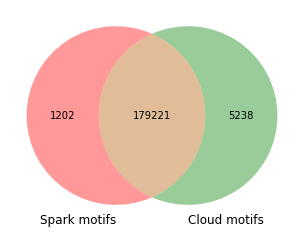

In [9]:
venn2_unweighted([set(df_spark[(df_spark["conf 5"] > 0.5)].motif), set(df_cloud[(df_cloud["conf 5"] > 0.5)].motif)], set_labels=["Spark motifs", "Cloud motifs"])

In [10]:
df_cloud.dtypes

group      object
motif      object
fc 0        int64
fc 1        int64
fc 2        int64
fc 3        int64
fc 4        int64
fc 5        int64
conf 0    float64
conf 1    float64
conf 2    float64
conf 3    float64
conf 4    float64
conf 5    float64
dtype: object

In [11]:
cloud_motifs = df_cloud["motif"].sort_values()
cloud_motifs

0         AAAAAAAC
3         AAAAAAAG
7         AAAAAAAT
11        AAAAAAAY
22        AAAAAACC
            ...   
490711    YYTTAGAA
384600    YYTTCAAA
843175    YYTTCACA
842476    YYTTCCAA
491131    YYTTGAAA
Name: motif, Length: 1526903, dtype: object

In [12]:
spark_motifs = df_spark["motif"].sort_values()
spark_motifs

756386     AAAAAAAC
1405314    AAAAAAAG
233966     AAAAAAAT
1200243    AAAAAAAY
756387     AAAAAACA
             ...   
627157     YYTTAGAA
1158686    YYTTCAAA
159863     YYTTCACA
159845     YYTTCCAA
627361     YYTTGAAA
Name: motif, Length: 1488648, dtype: object

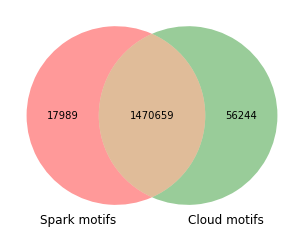

In [13]:
venn2_unweighted([set(spark_motifs), set(cloud_motifs)], set_labels=["Spark motifs", "Cloud motifs"])

In [14]:
1 - 1470659 / len(df_spark)

0.012084119281388195

In [15]:
1 - 1470659 / len(df_cloud)

0.03683534579472303

In [16]:
cloud_motifs[cloud_motifs == 'AAAAANTK']

14535    AAAAANTK
Name: motif, dtype: object

## Compare common spark and cloud motifs

In [17]:
def compare_fc(left, right, return_index=0):
    left = left.copy()
    right = right.copy()
    left.columns = right.columns
    comp = left.compare(right)
    return comp

def compare_conf(left, right, return_index=0):
    left = left.copy()
    right = right.copy()
    left.columns = right.columns
    comp = np.isclose(left, right)
    return comp

def compare_conf_lg(left, right, return_index=0):
    left = left.copy()
    right = right.copy()
    left.columns = right.columns
    comp = left >= right
    return comp

def compare_conf_diff(left, right, return_index=0):
    left = left.copy()
    right = right.copy()
    left.columns = right.columns
    comp = left - right
    return comp

def count_difference(comp, return_index=0):
    return comp.diff(axis=1).iloc[:,list(range(1,comp.shape[1],2))]

def get_differences_mask(left, right):
    left = left.copy()
    right = right.copy()
    left.columns = right.columns
    return ~np.isclose(left, right).all(axis=1)

In [18]:
common = set(spark_motifs) & set(cloud_motifs)

In [19]:
common_non_degen = []

for m in common:
    degen = False
    for c in m:
        if c not in "ACGT":
            degen = True
            break
    if not degen:
        common_non_degen.append(m)
len(common_non_degen)

5187

In [20]:
pd.set_option('display.max_columns', None)

def compare_common_motifs(df_l, df_r, suffix_l, suffix_r):
    common = set(df_l.motif) & set(df_r.motif)
    df = pd.merge(df_l,
        df_r,
        on="motif", suffixes=(suffix_l, suffix_r))
    return df[df.motif.isin(common)]

def compare_left_motifs(df_l, df_r, suffix_l, suffix_r):
    only_left = set(df_l.motif) - set(df_r.motif)
    df = pd.merge(df_l,
        df_r,
        on="motif", suffixes=(suffix_l, suffix_r))
    return df[df.motif.isin(only_left)]


common_s_c = compare_common_motifs(df_spark, df_cloud, "_s", "_c")
common_s_c

,motif,fc 0_s,fc 1_s,fc 2_s,fc 3_s,fc 4_s,fc 5_s,conf 0_s,conf 1_s,conf 2_s,conf 3_s,conf 4_s,conf 5_s,group,fc 0_c,fc 1_c,fc 2_c,fc 3_c,fc 4_c,fc 5_c,conf 0_c,conf 1_c,conf 2_c,conf 3_c,conf 4_c,conf 5_c
0,TTACAAAA,1,1,1,0,0,0,0.000000,1.000000,1.000000,0.0,0.0,0.0,AAAAACTT,1,1,1,0,0,0,0.000000,1.000000,1.000000,0.0,0.0,0.0
1,ATTCAAAA,1,1,1,0,0,0,0.000000,1.000000,1.000000,0.0,0.0,0.0,AAAAACTT,1,1,1,0,0,0,0.000000,1.000000,1.000000,0.0,0.0,0.0
2,ACTAAAAT,1,1,0,0,0,0,0.000000,1.000000,0.000000,0.0,0.0,0.0,AAAAACTT,1,1,0,0,0,0,0.000000,1.000000,0.000000,0.0,0.0,0.0
3,AACAATTA,1,1,1,0,0,0,0.000000,1.000000,1.000000,0.0,0.0,0.0,AAAAACTT,1,1,1,0,0,0,0.000000,1.000000,1.000000,0.0,0.0,0.0
4,TCAATAAA,1,1,1,0,0,0,0.000000,1.000000,1.000000,0.0,0.0,0.0,AAAAACTT,1,1,1,0,0,0,0.000000,1.000000,1.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470654,AGTMAGMG,1,1,1,1,0,0,0.000000,0.000000,0.000000,1.0,0.0,0.0,AAGGGMMT,1,1,1,1,0,0,0.000000,0.000000,0.000000,1.0,0.0,0.0
1470655,AAGTGMMG,2,2,2,0,0,0,0.500000,0.500000,0.500000,0.0,0.0,0.0,AAGGGMMT,2,2,2,0,0,0,0.500000,0.500000,0.500000,0.0,0.0,0.0
1470656,GMAGMTAG,3,2,2,2,1,1,0.666667,0.500000,0.500000,1.0,1.0,1.0,AAGGGMMT,3,2,2,2,1,1,0.666667,0.500000,0.500000,1.0,1.0,1.0
1470657,GATGGMAM,3,3,3,1,1,0,0.666667,0.666667,0.666667,1.0,1.0,0.0,AAGGGMMT,3,3,3,1,1,0,0.666667,0.666667,0.666667,1.0,1.0,0.0


In [21]:
compare_fc(common_s_c.iloc[:, 7:13], common_s_c.iloc[:, 20:])

conf 0_c            conf 1_c            conf 2_c           conf 3_c  \
             self     other      self     other      self     other     self   
6        0.666667  0.666667       NaN       NaN       NaN       NaN      NaN   
12       0.666667  0.666667       NaN       NaN       NaN       NaN      NaN   
15       0.666667  0.666667       NaN       NaN       NaN       NaN      NaN   
16       0.666667  0.666667       NaN       NaN       NaN       NaN      NaN   
62       0.666667  0.666667       NaN       NaN       NaN       NaN      NaN   
...           ...       ...       ...       ...       ...       ...      ...   
1470643  0.666667  0.666667       NaN       NaN       NaN       NaN      NaN   
1470647       NaN       NaN       NaN       NaN  0.666667  0.666667      NaN   
1470649       NaN       NaN  0.666667  0.666667       NaN       NaN      NaN   
1470656  0.666667  0.666667       NaN       NaN       NaN       NaN      NaN   
1470657  0.666667  0.666667  0.666667  0.666667  0.666667  0.666667      NaN   

              conf 4_c       conf 5_c        
        other     self other     self other  
6         NaN      NaN   NaN      NaN   NaN  
12        NaN      NaN   NaN      NaN   NaN  
15        NaN      NaN   NaN      NaN   NaN  
16        NaN      NaN   NaN      NaN   NaN  
62        NaN      NaN   NaN      NaN   NaN  
...       ...      ...   ...      ...   ...  
1470643   NaN      NaN   NaN      NaN   NaN  
1470647   NaN      NaN   NaN      NaN   NaN  
1470649   NaN      NaN   NaN      NaN   NaN  
1470656   NaN      NaN   NaN      NaN   NaN  
1470657   NaN      NaN   NaN      NaN   NaN  

[590765 rows x 12 columns]

Floats are bad for DataFrame.compare function 

In [22]:
conf_compare = compare_conf_lg(common_s_c.iloc[:, 7:13], common_s_c.iloc[:, 20:])
conf_compare.mean()

conf 0_c    0.974702
conf 1_c    0.970792
conf 2_c    0.978837
conf 3_c    0.995881
conf 4_c    0.998716
conf 5_c    0.999963
dtype: float64

In [23]:
conf_compare = compare_conf_lg(common_s_c.iloc[:, 20:], common_s_c.iloc[:, 7:13])
conf_compare.mean()

conf 0_s    0.805280
conf 1_s    0.819779
conf 2_s    0.851835
conf 3_s    0.954215
conf 4_s    0.982696
conf 5_s    0.997005
dtype: float64

In [24]:
conf_compare = compare_conf(common_s_c.iloc[:, 7:13], common_s_c.iloc[:, 20:])
conf_compare.mean()

0.9792198599403397

In [25]:
conf_compare.mean(axis=0)

array([0.97339696, 0.95337192, 0.96674552, 0.98792922, 0.99439571,
       0.99947983])

In [26]:
mask = get_differences_mask(common_s_c.iloc[:, 7:13], common_s_c.iloc[:, 20:])
print(mask.mean())
common_s_c[mask]

0.12348545787976682


,motif,fc 0_s,fc 1_s,fc 2_s,fc 3_s,fc 4_s,fc 5_s,conf 0_s,conf 1_s,conf 2_s,conf 3_s,conf 4_s,conf 5_s,group,fc 0_c,fc 1_c,fc 2_c,fc 3_c,fc 4_c,fc 5_c,conf 0_c,conf 1_c,conf 2_c,conf 3_c,conf 4_c,conf 5_c
1534,TRMTAAAA,6,6,6,4,2,2,0.000,0.166667,0.166667,0.25,0.000000,0.5,AAAAMRTT,6,6,6,4,2,2,0.000,0.166667,0.166667,0.25,0.500000,0.5
1535,ARTMATAA,7,5,5,4,2,2,0.000,0.000000,0.000000,0.25,0.000000,0.5,AAAAMRTT,7,5,5,4,2,2,0.000,0.000000,0.000000,0.25,0.500000,0.5
1536,TARMAATA,6,5,5,2,2,2,0.000,0.000000,0.000000,0.00,0.000000,0.5,AAAAMRTT,6,5,5,2,2,2,0.000,0.000000,0.000000,0.00,0.500000,0.5
1537,ARAATMAT,7,7,6,4,3,2,0.000,0.285714,0.166667,0.25,0.333333,0.5,AAAAMRTT,7,7,6,4,3,2,0.000,0.285714,0.166667,0.25,0.666667,0.5
1538,TRATAAMA,5,5,5,3,2,2,0.000,0.000000,0.000000,0.00,0.000000,0.5,AAAAMRTT,5,5,5,3,2,2,0.000,0.000000,0.000000,0.00,0.500000,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466843,WNCAGTAC,3,3,3,1,1,0,0.000,0.333333,0.333333,1.00,1.000000,0.0,AACCGNTW,3,3,3,1,1,0,0.000,0.333333,0.333333,0.00,1.000000,0.0
1466844,ANCATCGW,2,1,1,1,1,0,0.000,0.000000,0.000000,1.00,1.000000,0.0,AACCGNTW,2,1,1,1,1,0,0.000,0.000000,0.000000,0.00,1.000000,0.0
1466845,WGCATCNA,8,4,4,4,3,1,0.625,0.500000,0.500000,1.00,1.000000,1.0,AACCGNTW,8,4,4,4,3,1,0.625,0.500000,0.500000,0.75,1.000000,1.0
1466847,WNCCTGAA,3,2,2,1,1,0,0.000,0.000000,0.000000,1.00,1.000000,0.0,AACCGNTW,3,2,2,1,1,0,0.000,0.000000,0.000000,0.00,1.000000,0.0


In [27]:
conf_diff_s = common_s_c[mask].iloc[:, 7:13].mean()
conf_diff_c = common_s_c[mask].iloc[:, 20:].mean()

In [28]:
conf_diff_s

conf 0_s    0.315971
conf 1_s    0.396047
conf 2_s    0.554209
conf 3_s    0.492435
conf 4_s    0.365757
conf 5_s    0.172637
dtype: float64

In [29]:
conf_diff_c

conf 0_c    0.345685
conf 1_c    0.431264
conf 2_c    0.580546
conf 3_c    0.462043
conf 4_c    0.346038
conf 5_c    0.170111
dtype: float64

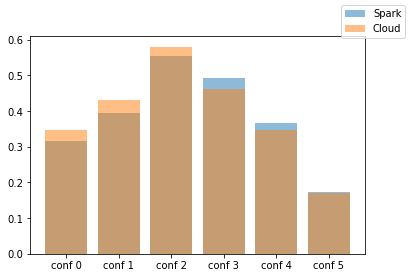

In [30]:
fig, ax = plt.subplots(sharex=True)
ax.bar([f"conf {i}" for i in range(6)], conf_diff_s, alpha=0.5, label="Spark")
ax.bar([f"conf {i}" for i in range(6)], conf_diff_c, alpha=0.5, label="Cloud")
fig.legend()

In [31]:
df_diff = compare_conf_diff(common_s_c[mask].iloc[:, 7:13],common_s_c[mask].iloc[:, 20:])
df_diff

,conf 0_c,conf 1_c,conf 2_c,conf 3_c,conf 4_c,conf 5_c
1534,0.0,3.333333e-09,3.333333e-09,0.00,-0.500000,0.0
1535,0.0,0.000000e+00,0.000000e+00,0.00,-0.500000,0.0
1536,0.0,0.000000e+00,0.000000e+00,0.00,-0.500000,0.0
1537,0.0,1.428571e-08,3.333333e-09,0.00,-0.333333,0.0
1538,0.0,0.000000e+00,0.000000e+00,0.00,-0.500000,0.0
...,...,...,...,...,...,...
1466843,0.0,6.666667e-09,6.666667e-09,1.00,0.000000,0.0
1466844,0.0,0.000000e+00,0.000000e+00,1.00,0.000000,0.0
1466845,0.0,0.000000e+00,0.000000e+00,0.25,0.000000,0.0
1466847,0.0,0.000000e+00,0.000000e+00,1.00,0.000000,0.0


In [32]:
np.isclose(df_diff, 0).mean(axis=0)

array([0.69658324, 0.5541147 , 0.6741114 , 0.86641888, 0.93735305,
       0.99117866])

In [33]:
df_diff.iloc[:, 1].value_counts().sort_index()

-1.000000    15197
-0.500000    11353
-0.333333      566
-0.333333     2181
-0.333333     1919
             ...  
 0.333333     1143
 0.333333      559
 0.333333     1838
 0.500000     6720
 1.000000    10983
Name: conf 1_c, Length: 88, dtype: int64

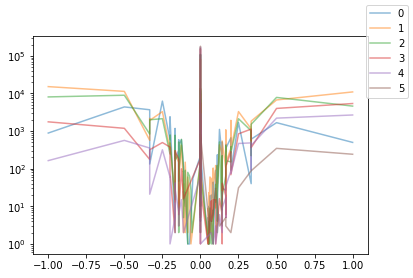

In [34]:
fig, ax = plt.subplots(sharex=True)
for i in range(6):
    ax.plot(df_diff.iloc[:, i].value_counts().sort_index(), alpha=0.5, label=f"{i}")
fig.legend()
ax.set_yscale('log')

In [35]:
common_s_c[mask][common_s_c[mask].motif.isin(common_non_degen)]

,motif,fc 0_s,fc 1_s,fc 2_s,fc 3_s,fc 4_s,fc 5_s,conf 0_s,conf 1_s,conf 2_s,conf 3_s,conf 4_s,conf 5_s,group,fc 0_c,fc 1_c,fc 2_c,fc 3_c,fc 4_c,fc 5_c,conf 0_c,conf 1_c,conf 2_c,conf 3_c,conf 4_c,conf 5_c
231654,AAAAAAAT,8,6,6,5,4,2,0.125000,0.000000,0.166667,0.40,0.500000,0.5,AAAAAAAT,8,6,6,5,4,2,0.062500,0.000000,0.083333,0.40,0.500000,0.5
231655,ATAAAAAA,9,8,8,4,3,2,0.222222,0.250000,0.375000,0.25,0.333333,0.5,AAAAAAAT,9,8,8,4,3,2,0.166667,0.250000,0.312500,0.25,0.333333,0.5
425925,AAAAAACC,2,2,2,0,0,0,0.500000,0.500000,0.500000,0.00,0.000000,0.0,AAAAAACC,2,2,2,0,0,0,0.250000,0.500000,0.500000,0.00,0.000000,0.0
425926,CAAAAAAC,3,3,2,0,0,0,0.666667,0.666667,0.500000,0.00,0.000000,0.0,AAAAAACC,3,3,2,0,0,0,0.500000,0.666667,0.500000,0.00,0.000000,0.0
425927,ACAAAAAC,2,2,1,0,0,0,0.500000,0.500000,0.000000,0.00,0.000000,0.0,AAAAAACC,2,2,1,0,0,0,0.250000,0.500000,0.000000,0.00,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370375,GGAAGAGA,1,0,0,0,0,0,1.000000,0.000000,0.000000,0.00,0.000000,0.0,AAAAGGGG,1,0,0,0,0,0,0.500000,0.000000,0.000000,0.00,0.000000,0.0
1389847,AAAAAAAG,9,9,9,2,1,0,0.555556,0.666667,0.666667,0.50,1.000000,0.0,AAAAAAAG,9,9,9,2,1,0,0.444444,0.555556,0.611111,0.50,0.500000,0.0
1389848,GAAAAAAA,6,6,4,1,1,0,0.333333,0.500000,0.250000,0.00,1.000000,0.0,AAAAAAAG,6,6,4,1,1,0,0.166667,0.333333,0.125000,0.00,0.500000,0.0
1389849,AAAAAAGA,2,2,2,1,1,1,0.000000,0.000000,0.000000,0.00,1.000000,1.0,AAAAAAAG,2,2,2,1,1,1,0.000000,0.000000,0.000000,0.00,0.500000,1.0


In [36]:
comp = compare_fc(common_s_c.iloc[:, 7:13], common_s_c.iloc[:, 20:])

In [37]:
count_difference(comp).describe()

,conf 0_c,conf 1_c,conf 2_c,conf 3_c,conf 4_c,conf 5_c
,other,other,other,other,other,other
count,3.235700e+05,3.079990e+05,2.490240e+05,7.339100e+04,2.733700e+04,4.460000e+03
mean,1.667745e-02,2.076498e-02,1.920700e-02,-7.520602e-02,-1.309952e-01,-1.028604e-01
std,1.203299e-01,3.231402e-01,2.692903e-01,3.391393e-01,3.465022e-01,2.567799e-01
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,-3.333333e-08,-3.333333e-08,-3.333333e-08,-3.333333e-08,-3.333333e-08,-3.333333e-08
50%,-2.857143e-08,-2.857143e-08,-1.285714e-08,-3.333333e-08,-3.333333e-08,-3.333333e-08
75%,-6.666667e-09,-6.666667e-09,-6.666667e-09,-6.666667e-09,-6.666667e-09,-3.333333e-08
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.333333e-08


## Compare with motifIterator output

Input file has 10 gene families, with 9 of 4 species and one of 5 species, resulting in 41 DNA regions.  


'GGTCAGCA' has only one occurence, reverse complement has 4 occurences in all species of a gene family:

- ((BD:0.2688,OS:0.2688):0.0538,(SB:0.086,ZM:0.086):0.2366);
- 4 regions
- occurence in OS
- cloud: 1 1 1 1 1 1 	100.0 100.0 100.0 100.0 100.0 100.0
- spark: 1 0 0 0 0 0 	1.0 0.0 0.0 0.0 0.0 0.0

![afbeelding.png](msa_GGTCAGCA.png)

Do manual motifIterator on input fle:

```
motifIterator treefix_groupOrtho1.txt AF 2 '0.15,0.5,0.6,0.7,0.9,0.95' 2 8 9 > group1_iterator_output
```

```
> ./motifdeserialiser < group1_iterator_output | grep 'GGTCAGCA'

AACCGGGT        GGTCAGCA        6
```

Reverse complement: TGCTGACC
- Present in all 

```
./motifdeserialiser < group1_iterator_output | wc -l

10424709
```

- Length df_spark: 41686
- Length df_cloud: 1526903

```
./motifdeserialiser < group1_iterator_output | cut -f2 | sort | uniq | wc -l
3871913
```

- counted motifIterator has same output size

```
./motifdeserialiser --counted < counted_group1_iterator_output | wc -l
3871913
```

In [3]:
df_iterator = pd.read_csv("treefix2_motifIterator_output", delim_whitespace=True, header=None,
                      names=[
                          "group",
                          "motif",
                          *[f"fc {x}" for x in range(6)],
                      ]) 
df_iterator

,group,motif,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5
0,AAAAAAAA,AAAAAAAA,9,8,6,3,3,3
1,AAAAAAAC,AAAAAAAC,4,3,2,2,2,1
2,AAAAAAAM,AAAAAAAM,9,8,6,3,3,3
3,AAAAAAAG,AAAAAAAG,9,9,9,2,1,0
4,AAAAAAAR,AAAAAAAR,10,10,10,8,7,3
...,...,...,...,...,...,...,...,...
2507269,AAAGNNTT,NNTTGAAA,10,10,9,9,6,3
2507270,AACGNNTT,NNTTGAAC,7,6,6,3,1,0
2507271,AACGNNTT,NNTTGACA,9,8,8,5,5,2
2507272,AACGNNTT,NNTTGCAA,6,5,3,1,1,1


In [4]:
transtable = str.maketrans("ACGTNRYSWKMBVDH", "TGCANYRSWMKVBHD")

In [5]:
rc = df_iterator.motif.apply(lambda x: str.translate(x, transtable)[::-1])
rc

0          TTTTTTTT
1          GTTTTTTT
2          KTTTTTTT
3          CTTTTTTT
4          YTTTTTTT
             ...   
2507269    TTTCAANN
2507270    GTTCAANN
2507271    TGTCAANN
2507272    TTGCAANN
2507273    TTTAAANN
Name: motif, Length: 2507274, dtype: object

In [6]:
(df_iterator.motif == rc).mean()

0.00041399543887106076

In [7]:
df_iterator[df_iterator.motif == rc]

,group,motif,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5
4444,AAAATTTT,AAAATTTT,2,2,0,0,0,0
13529,AAAKMTTT,AAAMKTTT,4,4,2,1,1,0
20643,AAARTTTY,AAARYTTT,3,3,2,1,1,0
21895,AAASSTTT,AAASSTTT,1,0,0,0,0,0
23028,AAAATTTT,AAATATTT,4,3,1,0,0,0
...,...,...,...,...,...,...,...,...
2495886,AACGNNTT,NTGTACAN,7,6,5,1,1,0
2497243,AAANNTTT,NTTATAAN,7,7,6,4,1,0
2497466,AACGNNTT,NTTCGAAN,3,3,2,0,0,0
2497596,AACGNNTT,NTTGCAAN,6,5,3,1,1,1


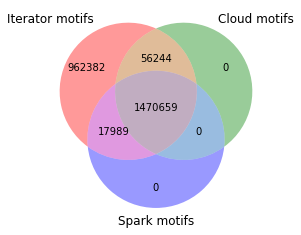

In [39]:
venn3_unweighted([set(df_iterator.motif), set(cloud_motifs), set(spark_motifs)], set_labels=["Iterator motifs", "Cloud motifs", "Spark motifs"])

In [40]:
df_iterator[df_iterator.motif == "GGTCAGCA"]

,group,motif,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5
1566755,AACCGGGT,GGTCAGCA,1,1,1,1,1,1


## Compare common cloud and iterator motifs

In [41]:
# check if all motifIterator counts also are in cloud speller
df_c_i = df_cloud.merge(df_iterator, on="motif", suffixes=("_c", "_i"))
df_c_i

,group_c,motif,fc 0_c,fc 1_c,fc 2_c,fc 3_c,fc 4_c,fc 5_c,conf 0,conf 1,conf 2,conf 3,conf 4,conf 5,group_i,fc 0_i,fc 1_i,fc 2_i,fc 3_i,fc 4_i,fc 5_i
0,AAAAAAAC,AAAAAAAC,4,3,2,2,2,1,0.000000,0.000000,0.000000,0.000000,0.25,1.0,AAAAAAAC,4,3,2,2,2,1
1,AAAAAAAC,CAAAAAAA,7,5,5,3,2,1,0.142857,0.000000,0.000000,0.333333,0.25,1.0,AAAAAAAC,7,5,5,3,2,1
2,AAAAAAAG,AAAAAAGA,2,2,2,1,1,1,0.000000,0.000000,0.000000,0.000000,0.50,1.0,AAAAAAAG,2,2,2,1,1,1
3,AAAAAAAG,AAAAAAAG,9,9,9,2,1,0,0.444444,0.555556,0.611111,0.500000,0.50,0.0,AAAAAAAG,9,9,9,2,1,0
4,AAAAAAAG,AAAAAGAA,3,3,3,2,1,0,0.000000,0.000000,0.000000,0.500000,0.50,0.0,AAAAAAAG,3,3,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526898,CCCGGGKK,GKKGCGCC,4,4,3,1,1,0,0.750000,0.750000,0.666667,1.000000,1.00,0.0,CCCGGGKK,4,4,3,1,1,0
1526899,CCCGGGKK,KCKCCGGG,1,1,1,1,1,0,0.000000,0.000000,0.000000,1.000000,1.00,0.0,CCCGGGKK,1,1,1,1,1,0
1526900,CCCGGGKK,GGKKGCCC,2,1,1,0,0,0,0.500000,0.000000,0.000000,0.000000,0.00,0.0,CCCGGGKK,2,1,1,0,0,0
1526901,CCCGGGKK,GKCKCGGC,2,0,0,0,0,0,0.500000,0.000000,0.000000,0.000000,0.00,0.0,CCCGGGKK,2,0,0,0,0,0


All family count errors between cloud and iterator are off-by-one errors (+1 in cloud counts) for threshold 2 and 4

In [42]:
mask.mean()

0.12348545787976682

In [43]:
df_c_i

,group_c,motif,fc 0_c,fc 1_c,fc 2_c,fc 3_c,fc 4_c,fc 5_c,conf 0,conf 1,conf 2,conf 3,conf 4,conf 5,group_i,fc 0_i,fc 1_i,fc 2_i,fc 3_i,fc 4_i,fc 5_i
0,AAAAAAAC,AAAAAAAC,4,3,2,2,2,1,0.000000,0.000000,0.000000,0.000000,0.25,1.0,AAAAAAAC,4,3,2,2,2,1
1,AAAAAAAC,CAAAAAAA,7,5,5,3,2,1,0.142857,0.000000,0.000000,0.333333,0.25,1.0,AAAAAAAC,7,5,5,3,2,1
2,AAAAAAAG,AAAAAAGA,2,2,2,1,1,1,0.000000,0.000000,0.000000,0.000000,0.50,1.0,AAAAAAAG,2,2,2,1,1,1
3,AAAAAAAG,AAAAAAAG,9,9,9,2,1,0,0.444444,0.555556,0.611111,0.500000,0.50,0.0,AAAAAAAG,9,9,9,2,1,0
4,AAAAAAAG,AAAAAGAA,3,3,3,2,1,0,0.000000,0.000000,0.000000,0.500000,0.50,0.0,AAAAAAAG,3,3,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526898,CCCGGGKK,GKKGCGCC,4,4,3,1,1,0,0.750000,0.750000,0.666667,1.000000,1.00,0.0,CCCGGGKK,4,4,3,1,1,0
1526899,CCCGGGKK,KCKCCGGG,1,1,1,1,1,0,0.000000,0.000000,0.000000,1.000000,1.00,0.0,CCCGGGKK,1,1,1,1,1,0
1526900,CCCGGGKK,GGKKGCCC,2,1,1,0,0,0,0.500000,0.000000,0.000000,0.000000,0.00,0.0,CCCGGGKK,2,1,1,0,0,0
1526901,CCCGGGKK,GKCKCGGC,2,0,0,0,0,0,0.500000,0.000000,0.000000,0.000000,0.00,0.0,CCCGGGKK,2,0,0,0,0,0


In [44]:
mask = get_differences_mask(df_c_i.iloc[:, 2:8], df_c_i.iloc[:, 15:21])
df_c_i[mask]

,group_c,motif,fc 0_c,fc 1_c,fc 2_c,fc 3_c,fc 4_c,fc 5_c,conf 0,conf 1,conf 2,conf 3,conf 4,conf 5,group_i,fc 0_i,fc 1_i,fc 2_i,fc 3_i,fc 4_i,fc 5_i


## Compare Spark and raw iterator output

In [45]:
# check if all motifIterator counts also are in cloud speller
df_s_i = df_spark.merge(df_iterator, on="motif", suffixes=("_s", "_i"))
df_s_i

,motif,fc 0_s,fc 1_s,fc 2_s,fc 3_s,fc 4_s,fc 5_s,conf 0,conf 1,conf 2,conf 3,conf 4,conf 5,group,fc 0_i,fc 1_i,fc 2_i,fc 3_i,fc 4_i,fc 5_i
0,TTACAAAA,1,1,1,0,0,0,0.000000,1.000000,1.000000,0.0,0.0,0.0,AAAAACTT,1,1,1,0,0,0
1,ATTCAAAA,1,1,1,0,0,0,0.000000,1.000000,1.000000,0.0,0.0,0.0,AAAAACTT,1,1,1,0,0,0
2,ACTAAAAT,1,1,0,0,0,0,0.000000,1.000000,0.000000,0.0,0.0,0.0,AAAAACTT,1,1,0,0,0,0
3,AACAATTA,1,1,1,0,0,0,0.000000,1.000000,1.000000,0.0,0.0,0.0,AAAAACTT,1,1,1,0,0,0
4,TCAATAAA,1,1,1,0,0,0,0.000000,1.000000,1.000000,0.0,0.0,0.0,AAAAACTT,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488643,AGTMAGMG,1,1,1,1,0,0,0.000000,0.000000,0.000000,1.0,0.0,0.0,AAGGGMMT,1,1,1,1,0,0
1488644,AAGTGMMG,2,2,2,0,0,0,0.500000,0.500000,0.500000,0.0,0.0,0.0,AAGGGMMT,2,2,2,0,0,0
1488645,GMAGMTAG,3,2,2,2,1,1,0.666667,0.500000,0.500000,1.0,1.0,1.0,AAGGGMMT,3,2,2,2,1,1
1488646,GATGGMAM,3,3,3,1,1,0,0.666667,0.666667,0.666667,1.0,1.0,0.0,AAGGGMMT,3,3,3,1,1,0


In [46]:
mask = get_differences_mask(df_s_i.iloc[:, 1:7], df_s_i.iloc[:, 14:20])
df_s_i[mask]

,motif,fc 0_s,fc 1_s,fc 2_s,fc 3_s,fc 4_s,fc 5_s,conf 0,conf 1,conf 2,conf 3,conf 4,conf 5,group,fc 0_i,fc 1_i,fc 2_i,fc 3_i,fc 4_i,fc 5_i


In [47]:
comp = compare_fc(df_s_i.iloc[:, 1:7], df_s_i.iloc[:, 14:20])

No difference between motifIterator and Spark family counts, as expected

## Check algo of Spark implementation

In [48]:
## mapsideCombine of motifIterator 
df_iterator.motif.unique().size

2507274

In [49]:
df_small = df_iterator[:12].copy()
df_small

,group,motif,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5
0,AAAAAAAA,AAAAAAAA,9,8,6,3,3,3
1,AAAAAAAC,AAAAAAAC,4,3,2,2,2,1
2,AAAAAAAM,AAAAAAAM,9,8,6,3,3,3
3,AAAAAAAG,AAAAAAAG,9,9,9,2,1,0
4,AAAAAAAR,AAAAAAAR,10,10,10,8,7,3
5,AAAAAAAS,AAAAAAAS,9,9,9,5,4,1
6,AAAAAAAT,AAAAAAAT,8,6,6,5,4,2
7,AAAAAAAW,AAAAAAAW,10,9,7,6,6,5
8,AAAAAAAY,AAAAAAAY,10,9,7,6,6,5
9,AAAAAAAK,AAAAAAAK,10,10,10,9,7,3


In [50]:
from itertools import permutations
from math import factorial

def get_number_of_permutations(s, method="fac"):
    if method == "fac":
        output = 1
        for c in set(s):
            output *= factorial(s.count(c))
        return int(factorial(len(s)) / output)
    else:
        return len(set(permutations(s)))

def find_k_median(arr, k):
    print(f"k {k}")
    pivot = len(arr) // 2
    print(f"Pivot {pivot}")
    left, right = np.array_split(np.partition(arr, pivot), [pivot])
    print(f"Left {pivot}")
    print(f"Right {pivot}")
    if len(left) == k:
        return arr[pivot]
    elif len(left) == 0:
        left, right = np.array_split(np.partition(arr, pivot), [pivot])
        find_k_median(right, k - len(left))
    elif len(right) < k:
        find_k_median(right, k - len(left))
    else:
        find_k_median(left, k)

def find_median(arr):
    return find_k_median(arr, (len(arr) - 1) / 2)
    
def get_median_per_threshold(df, n_thresholds=6, method="median") -> np.ndarray:
    if method == "perm":
        # find the maximum number of permutations the key can represent
        perms = get_number_of_permutations(df.iloc[0, 0])
        if perms == 1:
            # return first value if this is only one
            return df.iloc[0, 2:].values
        else:
            # else brute force calculate the remaining mean
            nr = (perms + 1) / 2
            arr = np.zeros(n_thresholds)
            # return zero if amount of rows is more than double the permutations
            if df.shape[0] > nr:
                k = df.shape[0] - nr - 1
                for i in range(n_thresholds):
                    # find the mean for each threshold using divide-and-conquer
                    arr[i] = find_k_median(df[2+i], k)
            return arr
    else:
        max_permutations = get_number_of_permutations(df.iat[0, 0])
        half = (max_permutations + 1) / 2
        group_permutations = len(df)
        if max_permutations == 1:
            arr = df.iloc[0,2:]
#         print(half)
#         print(group_permutations)
        elif group_permutations < half:
            arr = np.zeros(n_thresholds)
        else:
            arr = np.quantile(df.iloc[:,2:], 1 - half/group_permutations, axis=0, interpolation="lower")
#         print(arr)
#         print(df.columns[-6:])
        return pd.Series(arr, index=df.columns[-n_thresholds:])

In [51]:
arr = np.array([1, 2, 2, 3])

print(arr.mean())

2.0


In [52]:
np.split(np.array([1, 2, 2, 3]), [0])


[array([], dtype=int64), array([1, 2, 2, 3])]

In [53]:
len([])

0

In [54]:
# calculating number of partition methods are equivalent
import random

for s in ["".join([random.choice("ACTGN") for _ in range(8)]) for _ in range(100)]:
    fac = get_number_of_permutations(s)
    perm = get_number_of_permutations(s, method=None)
    if fac != perm:
        print(fac)
        print(perm)
        print()

In [55]:
df_small.groupby("group").agg(get_median_per_threshold).dropna(axis=1)

,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5
group,,,,,,
AAAAAAAA,9.0,8.0,6.0,3.0,3.0,3.0
AAAAAAAC,0.0,0.0,0.0,0.0,0.0,0.0
AAAAAAAG,0.0,0.0,0.0,0.0,0.0,0.0
AAAAAAAK,0.0,0.0,0.0,0.0,0.0,0.0
AAAAAAAM,0.0,0.0,0.0,0.0,0.0,0.0
AAAAAAAN,0.0,0.0,0.0,0.0,0.0,0.0
AAAAAAAR,0.0,0.0,0.0,0.0,0.0,0.0
AAAAAAAS,0.0,0.0,0.0,0.0,0.0,0.0
AAAAAAAT,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
df_small.groupby("group").apply(get_median_per_threshold)

,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5
group,,,,,,
AAAAAAAA,9.0,8.0,6.0,3.0,3.0,3.0
AAAAAAAC,0.0,0.0,0.0,0.0,0.0,0.0
AAAAAAAG,0.0,0.0,0.0,0.0,0.0,0.0
AAAAAAAK,0.0,0.0,0.0,0.0,0.0,0.0
AAAAAAAM,0.0,0.0,0.0,0.0,0.0,0.0
AAAAAAAN,0.0,0.0,0.0,0.0,0.0,0.0
AAAAAAAR,0.0,0.0,0.0,0.0,0.0,0.0
AAAAAAAS,0.0,0.0,0.0,0.0,0.0,0.0
AAAAAAAT,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# add medians for each group to motifs
df_medians = df_small.join(df_small.groupby("group").apply(get_median_per_threshold), on="group", rsuffix="_median")
df_medians

,group,motif,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5,fc 0_median,fc 1_median,fc 2_median,fc 3_median,fc 4_median,fc 5_median
0,AAAAAAAA,AAAAAAAA,9,8,6,3,3,3,9.0,8.0,6.0,3.0,3.0,3.0
1,AAAAAAAC,AAAAAAAC,4,3,2,2,2,1,0.0,0.0,0.0,0.0,0.0,0.0
2,AAAAAAAM,AAAAAAAM,9,8,6,3,3,3,0.0,0.0,0.0,0.0,0.0,0.0
3,AAAAAAAG,AAAAAAAG,9,9,9,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0
4,AAAAAAAR,AAAAAAAR,10,10,10,8,7,3,0.0,0.0,0.0,0.0,0.0,0.0
5,AAAAAAAS,AAAAAAAS,9,9,9,5,4,1,0.0,0.0,0.0,0.0,0.0,0.0
6,AAAAAAAT,AAAAAAAT,8,6,6,5,4,2,0.0,0.0,0.0,0.0,0.0,0.0
7,AAAAAAAW,AAAAAAAW,10,9,7,6,6,5,0.0,0.0,0.0,0.0,0.0,0.0
8,AAAAAAAY,AAAAAAAY,10,9,7,6,6,5,0.0,0.0,0.0,0.0,0.0,0.0
9,AAAAAAAK,AAAAAAAK,10,10,10,9,7,3,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# F family_count
# f_bg = median
# conf = 
# filter, pass if family_count >= family_count_cutoff and conf >= confidence_score_cutoff

def process(df, family_count_cutoff=1, confidence_score_cutoff=.5):
    df_medians = df.join(df.groupby("group").apply(get_median_per_threshold), on="group", rsuffix="_median")
    f = df_medians.iloc[:,2:8]
    f_bg = df_medians.iloc[:,8:]
    f_bg.columns = f.columns
    mask = f <= f_bg
    conf = 1 - f_bg/f
    conf[mask] = .0
    filter_mask = (f >= family_count_cutoff) & (conf >= confidence_score_cutoff)
    conf.columns = [f"conf {x.split()[1]}" for x in conf.columns]
    output = pd.concat([df, conf], axis=1)
    output = output[filter_mask.any(axis=1)]
    rc_mask = (output)
    return output

In [59]:
f = df_medians.iloc[:,2:8]
f_bg = df_medians.iloc[:,8:]
f_bg.columns = f.columns
# conf = np.zeros(f.shape)

mask = f <= f_bg
conf = (f - f_bg) / f
conf[mask] = .0
conf

,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5
0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0


In [60]:
filter_mask = (f >= 1) & (conf >= .5)
pd.concat([df_small, conf], axis=1)[filter_mask.any(axis=1)]

,group,motif,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5
1,AAAAAAAC,AAAAAAAC,4,3,2,2,2,1,1.0,1.0,1.0,1.0,1.0,1.0
2,AAAAAAAM,AAAAAAAM,9,8,6,3,3,3,1.0,1.0,1.0,1.0,1.0,1.0
3,AAAAAAAG,AAAAAAAG,9,9,9,2,1,0,1.0,1.0,1.0,1.0,1.0,0.0
4,AAAAAAAR,AAAAAAAR,10,10,10,8,7,3,1.0,1.0,1.0,1.0,1.0,1.0
5,AAAAAAAS,AAAAAAAS,9,9,9,5,4,1,1.0,1.0,1.0,1.0,1.0,1.0
6,AAAAAAAT,AAAAAAAT,8,6,6,5,4,2,1.0,1.0,1.0,1.0,1.0,1.0
7,AAAAAAAW,AAAAAAAW,10,9,7,6,6,5,1.0,1.0,1.0,1.0,1.0,1.0
8,AAAAAAAY,AAAAAAAY,10,9,7,6,6,5,1.0,1.0,1.0,1.0,1.0,1.0
9,AAAAAAAK,AAAAAAAK,10,10,10,9,7,3,1.0,1.0,1.0,1.0,1.0,1.0
10,AAAAAAAN,AAAAAAAN,10,10,10,9,8,5,1.0,1.0,1.0,1.0,1.0,1.0


In [61]:
process(df_small)

,group,motif,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5,conf 0,conf 1,conf 2,conf 3,conf 4,conf 5
1,AAAAAAAC,AAAAAAAC,4,3,2,2,2,1,1.0,1.0,1.0,1.0,1.0,1.0
2,AAAAAAAM,AAAAAAAM,9,8,6,3,3,3,1.0,1.0,1.0,1.0,1.0,1.0
3,AAAAAAAG,AAAAAAAG,9,9,9,2,1,0,1.0,1.0,1.0,1.0,1.0,0.0
4,AAAAAAAR,AAAAAAAR,10,10,10,8,7,3,1.0,1.0,1.0,1.0,1.0,1.0
5,AAAAAAAS,AAAAAAAS,9,9,9,5,4,1,1.0,1.0,1.0,1.0,1.0,1.0
6,AAAAAAAT,AAAAAAAT,8,6,6,5,4,2,1.0,1.0,1.0,1.0,1.0,1.0
7,AAAAAAAW,AAAAAAAW,10,9,7,6,6,5,1.0,1.0,1.0,1.0,1.0,1.0
8,AAAAAAAY,AAAAAAAY,10,9,7,6,6,5,1.0,1.0,1.0,1.0,1.0,1.0
9,AAAAAAAK,AAAAAAAK,10,10,10,9,7,3,1.0,1.0,1.0,1.0,1.0,1.0
10,AAAAAAAN,AAAAAAAN,10,10,10,9,8,5,1.0,1.0,1.0,1.0,1.0,1.0


In [62]:
df_new = process(df_iterator)
df_new

,group,motif,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5,conf 0,conf 1,conf 2,conf 3,conf 4,conf 5
1,AAAAAAAC,AAAAAAAC,4,3,2,2,2,1,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000
3,AAAAAAAG,AAAAAAAG,9,9,9,2,1,0,0.555556,0.666667,0.666667,0.500000,1.000000,0.000000
6,AAAAAAAT,AAAAAAAT,8,6,6,5,4,2,0.125000,0.000000,0.166667,0.400000,0.500000,0.500000
8,AAAAAAAY,AAAAAAAY,10,9,7,6,6,5,0.100000,0.000000,0.000000,0.000000,0.333333,0.600000
11,AAAAAAAC,AAAAAACA,7,7,7,3,2,0,0.142857,0.285714,0.285714,0.333333,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507262,AAACNNTT,NNTTCAAA,10,10,10,8,6,5,0.100000,0.200000,0.200000,0.250000,0.500000,0.600000
2507266,AACGNNTT,NNTTCAGA,5,5,5,4,3,1,0.000000,0.000000,0.000000,0.250000,0.333333,1.000000
2507269,AAAGNNTT,NNTTGAAA,10,10,9,9,6,3,0.100000,0.200000,0.222222,0.444444,0.500000,0.666667
2507271,AACGNNTT,NNTTGACA,9,8,8,5,5,2,0.222222,0.250000,0.375000,0.400000,0.600000,1.000000


### RC filter

In [121]:
transtable = str.maketrans("ACGTNRYSWKMBVDH", "TGCANYRSWMKVBHD")

def sorted_complement(s):
    return "".join(sorted(s.translate(transtable)))
    
def is_group_representative(s):
    rc = s.translate(transtable)[::-1]
    return s <= rc
    
rsc = [sorted_complement(x) for x in set(leftovers)]
rsc

['AAACGTTT',
 'AACCGGTT',
 'AACGRTTY',
 'ACCGGRTY',
 'AAAATTTT',
 'CCCGGGNW',
 'CCCCGGGG',
 'AACGKMTT',
 'AAANNTTT',
 'CCCGGGWW',
 'AAAKMTTT',
 'AACGNSTT',
 'CCCGGGKM',
 'CCCGGGNS',
 'ACCGGNNT',
 'AAANSTTT',
 'AACGSTTW',
 'ACCGGNST',
 'AAASTTTW',
 'AACGTTWW',
 'CCCGGGSS',
 'ACCGGTWW',
 'AAATTTWW',
 'AACGNNTT',
 'CCCGGGRY',
 'AAASSTTT',
 'ACCGGNTW',
 'CCCGGGSW',
 'CCCGGGNN',
 'AACGNTTW',
 'AACGSSTT',
 'ACCCGGGT',
 'AAARTTTY',
 'ACCGGSST',
 'ACCGGSTW',
 'ACCGGKMT',
 'AAANTTTW']

In [122]:
gr = [is_group_representative(x) for x in set(leftovers)]
gr

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [115]:
(df_new.group.apply(sorted_complement) == df_new.group).sum()

69549

In [ ]:
def rc_filter(df)
    group_is_sorted_complement = df.group.apply(sorted_complement) == df.group
    motif_is_representative = 
    return df.filter((~group_is_sorted_complement) | (group_is_sorted_complement & motif_is_representative))

In [71]:
df_new_filtered = rc_filter(df_new)
print(len(df_new))
print(len(df_spark))
print(len(df_new_filtered))

1523178
1488648
1523178


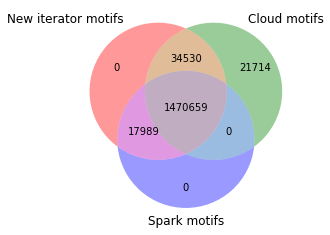

In [63]:
venn3_unweighted([set(df_new.motif), set(df_cloud.motif), set(df_spark.motif)], set_labels=["New iterator motifs", "Cloud motifs", "Spark motifs"])

## Check no own reverse complement

In [64]:
df_new

,group,motif,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5,conf 0,conf 1,conf 2,conf 3,conf 4,conf 5
1,AAAAAAAC,AAAAAAAC,4,3,2,2,2,1,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000
3,AAAAAAAG,AAAAAAAG,9,9,9,2,1,0,0.555556,0.666667,0.666667,0.500000,1.000000,0.000000
6,AAAAAAAT,AAAAAAAT,8,6,6,5,4,2,0.125000,0.000000,0.166667,0.400000,0.500000,0.500000
8,AAAAAAAY,AAAAAAAY,10,9,7,6,6,5,0.100000,0.000000,0.000000,0.000000,0.333333,0.600000
11,AAAAAAAC,AAAAAACA,7,7,7,3,2,0,0.142857,0.285714,0.285714,0.333333,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507262,AAACNNTT,NNTTCAAA,10,10,10,8,6,5,0.100000,0.200000,0.200000,0.250000,0.500000,0.600000
2507266,AACGNNTT,NNTTCAGA,5,5,5,4,3,1,0.000000,0.000000,0.000000,0.250000,0.333333,1.000000
2507269,AAAGNNTT,NNTTGAAA,10,10,9,9,6,3,0.100000,0.200000,0.222222,0.444444,0.500000,0.666667
2507271,AACGNNTT,NNTTGACA,9,8,8,5,5,2,0.222222,0.250000,0.375000,0.400000,0.600000,1.000000


In [65]:
df_spark

,motif,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5,conf 0,conf 1,conf 2,conf 3,conf 4,conf 5
0,TTACAAAA,1,1,1,0,0,0,0.000000,1.000000,1.000000,0.0,0.0,0.0
1,ATTCAAAA,1,1,1,0,0,0,0.000000,1.000000,1.000000,0.0,0.0,0.0
2,ACTAAAAT,1,1,0,0,0,0,0.000000,1.000000,0.000000,0.0,0.0,0.0
3,AACAATTA,1,1,1,0,0,0,0.000000,1.000000,1.000000,0.0,0.0,0.0
4,TCAATAAA,1,1,1,0,0,0,0.000000,1.000000,1.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488643,AGTMAGMG,1,1,1,1,0,0,0.000000,0.000000,0.000000,1.0,0.0,0.0
1488644,AAGTGMMG,2,2,2,0,0,0,0.500000,0.500000,0.500000,0.0,0.0,0.0
1488645,GMAGMTAG,3,2,2,2,1,1,0.666667,0.500000,0.500000,1.0,1.0,1.0
1488646,GATGGMAM,3,3,3,1,1,0,0.666667,0.666667,0.666667,1.0,1.0,0.0


In [66]:
df_l = df_new
df_r = df_spark
suffix_l = "_n"
suffix_r = "_r"

only_left = set(df_l.motif) - set(df_r.motif)
df = pd.merge(df_l,
    df_r,
    on="motif", how="outer", suffixes=(suffix_l, suffix_r))
df_rc = df[df.motif.isin(only_left)]
df_rc

,group,motif,fc 0_n,fc 1_n,fc 2_n,fc 3_n,fc 4_n,fc 5_n,conf 0_n,conf 1_n,conf 2_n,conf 3_n,conf 4_n,conf 5_n,fc 0_r,fc 1_r,fc 2_r,fc 3_r,fc 4_r,fc 5_r,conf 0_r,conf 1_r,conf 2_r,conf 3_r,conf 4_r,conf 5_r
12624,AAANSTTT,AAASNTTT,6,6,5,4,4,3,0.000000,0.166667,0.000000,0.250000,0.750000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17405,AAASTTTW,AAAWSTTT,5,5,4,3,3,2,0.200000,0.400000,0.250000,0.666667,1.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34096,AACGNTTW,AACWNGTT,3,3,3,2,1,0,0.000000,0.000000,0.000000,0.500000,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37634,AAAKMTTT,AAMAKTTT,7,7,5,3,2,1,0.285714,0.428571,0.400000,0.666667,1.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38465,AACGKMTT,AAMCKGTT,1,1,1,1,1,0,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523156,ACCGGNNT,NNTGCACG,6,3,2,1,1,1,0.166667,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1523157,ACCGGNNT,NNTGCAGC,9,9,9,8,5,2,0.444444,0.555556,0.555556,0.750000,0.800000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1523167,ACCGGNNT,NNTGGACC,8,8,7,4,2,1,0.375000,0.500000,0.428571,0.500000,0.500000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1523169,ACCGGNNT,NNTGGCAC,5,5,4,3,3,1,0.000000,0.200000,0.000000,0.333333,0.666667,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
leftovers = list(set(df_rc.group))
sorted(leftovers)

['AAAATTTT',
 'AAACGTTT',
 'AAAKMTTT',
 'AAANNTTT',
 'AAANSTTT',
 'AAANTTTW',
 'AAARTTTY',
 'AAASSTTT',
 'AAASTTTW',
 'AAATTTWW',
 'AACCGGTT',
 'AACGKMTT',
 'AACGNNTT',
 'AACGNSTT',
 'AACGNTTW',
 'AACGRTTY',
 'AACGSSTT',
 'AACGSTTW',
 'AACGTTWW',
 'ACCCGGGT',
 'ACCGGKMT',
 'ACCGGNNT',
 'ACCGGNST',
 'ACCGGNTW',
 'ACCGGRTY',
 'ACCGGSST',
 'ACCGGSTW',
 'ACCGGTWW',
 'CCCCGGGG',
 'CCCGGGKM',
 'CCCGGGNN',
 'CCCGGGNS',
 'CCCGGGNW',
 'CCCGGGRY',
 'CCCGGGSS',
 'CCCGGGSW',
 'CCCGGGWW']

In [106]:
transtable = str.maketrans("ACGTNRYSWKMBVDH", "TGCANYRSWMKVBHD")
rsc = ["".join(sorted(x.translate(transtable))) for x in leftovers]
sorted(rsc)

['AAAATTTT',
 'AAACGTTT',
 'AAAKMTTT',
 'AAANNTTT',
 'AAANSTTT',
 'AAANTTTW',
 'AAARTTTY',
 'AAASSTTT',
 'AAASTTTW',
 'AAATTTWW',
 'AACCGGTT',
 'AACGKMTT',
 'AACGNNTT',
 'AACGNSTT',
 'AACGNTTW',
 'AACGRTTY',
 'AACGSSTT',
 'AACGSTTW',
 'AACGTTWW',
 'ACCCGGGT',
 'ACCGGKMT',
 'ACCGGNNT',
 'ACCGGNST',
 'ACCGGNTW',
 'ACCGGRTY',
 'ACCGGSST',
 'ACCGGSTW',
 'ACCGGTWW',
 'CCCCGGGG',
 'CCCGGGKM',
 'CCCGGGNN',
 'CCCGGGNS',
 'CCCGGGNW',
 'CCCGGGRY',
 'CCCGGGSS',
 'CCCGGGSW',
 'CCCGGGWW']

In [107]:
[x == y for x, y in zip(leftovers, rsc)]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [85]:
[x for x in leftovers if x not in list(rsc)]

['AAACGTTT',
 'AACCGGTT',
 'AACGRTTY',
 'ACCGGRTY',
 'AAAATTTT',
 'CCCGGGNW',
 'CCCCGGGG',
 'AACGKMTT',
 'AAANNTTT',
 'CCCGGGWW',
 'AAAKMTTT',
 'AACGNSTT',
 'CCCGGGKM',
 'CCCGGGNS',
 'ACCGGNNT',
 'AAANSTTT',
 'AACGSTTW',
 'ACCGGNST',
 'AAASTTTW',
 'AACGTTWW',
 'CCCGGGSS',
 'ACCGGTWW',
 'AAATTTWW',
 'AACGNNTT',
 'CCCGGGRY',
 'AAASSTTT',
 'ACCGGNTW',
 'CCCGGGSW',
 'CCCGGGNN',
 'AACGNTTW',
 'AACGSSTT',
 'ACCCGGGT',
 'AAARTTTY',
 'ACCGGSST',
 'ACCGGSTW',
 'ACCGGKMT',
 'AAANTTTW']

In [275]:
only_left = set(df_new.motif) - set(df_spark.motif)
only_left

{'SSGGCACT',
 'TAARCTYG',
 'CCNWATGG',
 'TGNCAATS',
 'SCTAGCGS',
 'TGSATANC',
 'SSATCGCG',
 'TGSCAATN',
 'WTGACCNG',
 'CWNGGCCG',
 'SATGTCAN',
 'GGCSNATC',
 'TGTKAMCA',
 'WCATGGWC',
 'TTNCSAGA',
 'WTAGTCNA',
 'TMAAGCTK',
 'CNANATTG',
 'CTCWASGG',
 'CAATGMKT',
 'TTSAAWAT',
 'TSATSACG',
 'TSWAGATC',
 'TTGNNAAC',
 'GCWCWGCG',
 'TGACTNAN',
 'ACTAWSGT',
 'YGARCTTA',
 'ARAYCTGT',
 'CGNACWTG',
 'CAGGKCMT',
 'TWCGCWGA',
 'TNCNATAG',
 'STACWGGC',
 'AGCNASTT',
 'AMAKGTCT',
 'WATGNTAC',
 'GWACWTAT',
 'WCAGAWTT',
 'GGCCNANT',
 'SCGCTSAG',
 'SCWACTGG',
 'AYTGRACT',
 'TGACTARY',
 'MTCAGCKG',
 'KTGMCAAT',
 'CAATSGNT',
 'TWCGWGAC',
 'NTASATAT',
 'YATRGATC',
 'TTKAAMAT',
 'TSAAGCNT',
 'TSASATTA',
 'NGCAWTGC',
 'TAAGTCRY',
 'NNCAGGCT',
 'MAKTAGCT',
 'CWCTNAGG',
 'TWAAWCGT',
 'CNGWAGCT',
 'RAACYTTG',
 'CTSNAGAT',
 'TTGCWAAN',
 'TCAAGKMT',
 'CRYGAGCT',
 'STGCCSAG',
 'CSCSGGCG',
 'KGMAATTC',
 'SGCATCNG',
 'GGNNCACT',
 'TGWGCNAC',
 'TCGWAWCG',
 'SCAGTATS',
 'KMCGATGC',
 'ARGCYATT',
 'WCTGAATN',
 'TTCAAGKM',

In [269]:
compare_left_motifs(df_new, df_spark, "_n", "_s")

,group,motif,fc 0_n,fc 1_n,fc 2_n,fc 3_n,fc 4_n,fc 5_n,conf 0_n,conf 1_n,conf 2_n,conf 3_n,conf 4_n,conf 5_n,fc 0_s,fc 1_s,fc 2_s,fc 3_s,fc 4_s,fc 5_s,conf 0_s,conf 1_s,conf 2_s,conf 3_s,conf 4_s,conf 5_s


TypeError: 'Series' objects are mutable, thus they cannot be hashed

## Compare new and cloud motifs

In [72]:
common_n_c = compare_common_motifs(df_new, df_cloud, "_n", "_c")
common_n_c

,group_n,motif,fc 0_n,fc 1_n,fc 2_n,fc 3_n,fc 4_n,fc 5_n,conf 0_n,conf 1_n,conf 2_n,conf 3_n,conf 4_n,conf 5_n,group_c,fc 0_c,fc 1_c,fc 2_c,fc 3_c,fc 4_c,fc 5_c,conf 0_c,conf 1_c,conf 2_c,conf 3_c,conf 4_c,conf 5_c
0,AAAAAAAC,AAAAAAAC,4,3,2,2,2,1,0.000000,0.000000,0.000000,0.000000,0.250000,1.000000,AAAAAAAC,4,3,2,2,2,1,0.000000,0.000000,0.000000,0.000000,0.250000,1.000000
1,AAAAAAAG,AAAAAAAG,9,9,9,2,1,0,0.444444,0.555556,0.611111,0.500000,0.500000,0.000000,AAAAAAAG,9,9,9,2,1,0,0.444444,0.555556,0.611111,0.500000,0.500000,0.000000
2,AAAAAAAT,AAAAAAAT,8,6,6,5,4,2,0.062500,0.000000,0.083333,0.400000,0.500000,0.500000,AAAAAAAT,8,6,6,5,4,2,0.062500,0.000000,0.083333,0.400000,0.500000,0.500000
3,AAAAAAAY,AAAAAAAY,10,9,7,6,6,5,0.050000,0.000000,0.000000,0.000000,0.333333,0.500000,AAAAAAAY,10,9,7,6,6,5,0.050000,0.000000,0.000000,0.000000,0.333333,0.500000
4,AAAAAACC,AAAAAACC,2,2,2,0,0,0,0.000000,0.250000,0.500000,0.000000,0.000000,0.000000,AAAAAACC,2,2,2,0,0,0,0.250000,0.500000,0.500000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216356,AAACNNTT,NNTTCAAA,10,10,10,8,6,5,0.100000,0.200000,0.200000,0.250000,0.500000,0.600000,AAACNNTT,10,10,10,8,6,5,0.100000,0.200000,0.300000,0.250000,0.500000,0.600000
1216357,AACGNNTT,NNTTCAGA,5,5,5,4,3,1,0.000000,0.000000,0.000000,0.250000,0.333333,1.000000,AACGNNTT,5,5,5,4,3,1,0.000000,0.000000,0.000000,0.250000,0.333333,1.000000
1216358,AAAGNNTT,NNTTGAAA,10,10,9,9,6,3,0.100000,0.200000,0.222222,0.444444,0.500000,0.666667,AAAGNNTT,10,10,9,9,6,3,0.100000,0.200000,0.222222,0.444444,0.500000,0.666667
1216359,AACGNNTT,NNTTGACA,9,8,8,5,5,2,0.222222,0.250000,0.375000,0.400000,0.600000,1.000000,AACGNNTT,9,8,8,5,5,2,0.222222,0.250000,0.375000,0.400000,0.600000,1.000000


In [77]:
comp_n_c = compare_fc(common_n_c.iloc[:,2:8], common_n_c.iloc[:,15:21])
count_difference(comp_n_c)

Empty DataFrame
Columns: []
Index: []

### New algo

In [ ]:
mask = get_differences_mask(common_n_c.iloc[:, 8:14], common_n_c.iloc[:, 21:])
print(mask.mean())
common_n_c[mask]

### Old algo

In [76]:
mask = get_differences_mask(common_n_c.iloc[:, 8:14], common_n_c.iloc[:, 21:])
print(mask.mean())
common_n_c[mask]

0.5547596478348122


,group_n,motif,fc 0_n,fc 1_n,fc 2_n,fc 3_n,fc 4_n,fc 5_n,conf 0_n,conf 1_n,conf 2_n,conf 3_n,conf 4_n,conf 5_n,group_c,fc 0_c,fc 1_c,fc 2_c,fc 3_c,fc 4_c,fc 5_c,conf 0_c,conf 1_c,conf 2_c,conf 3_c,conf 4_c,conf 5_c
4,AAAAAACC,AAAAAACC,2,2,2,0,0,0,0.000000,0.250000,0.500000,0.000000,0.000000,0.0,AAAAAACC,2,2,2,0,0,0,0.250000,0.500000,0.500000,0.000000,0.000000,0.0
10,AAAAAACY,AAAAAACY,5,5,5,4,3,0,0.200000,0.200000,0.400000,0.750000,1.000000,0.0,AAAAAACY,5,5,5,4,3,0,0.200000,0.300000,0.400000,0.750000,1.000000,0.0
20,AAAAAAGT,AAAAAAGT,5,4,4,0,0,0,0.600000,0.750000,0.750000,0.000000,0.000000,0.0,AAAAAAGT,5,4,4,0,0,0,0.800000,0.750000,1.000000,0.000000,0.000000,0.0
22,AAAAAAGY,AAAAAAGY,9,7,6,3,1,0,0.666667,0.571429,0.500000,0.666667,1.000000,0.0,AAAAAAGY,9,7,6,3,1,0,0.666667,0.571429,0.583333,0.666667,1.000000,0.0
32,AAAAAAGT,AAAAAATG,2,2,2,0,0,0,0.000000,0.500000,0.500000,0.000000,0.000000,0.0,AAAAAAGT,2,2,2,0,0,0,0.500000,0.500000,1.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216333,AAACGNNT,NNTGCAAA,10,10,10,8,6,5,0.300000,0.300000,0.400000,0.500000,0.666667,0.8,AAACGNNT,10,10,10,8,6,5,0.300000,0.300000,0.400000,0.625000,0.666667,0.8
1216335,AACGGNNT,NNTGCAAG,9,7,6,5,3,1,0.333333,0.285714,0.166667,0.600000,0.666667,1.0,AACGGNNT,9,7,6,5,3,1,0.333333,0.285714,0.333333,0.600000,0.666667,1.0
1216347,AACGGNNT,NNTGGAAC,9,8,5,4,1,0,0.333333,0.375000,0.000000,0.500000,0.000000,0.0,AACGGNNT,9,8,5,4,1,0,0.333333,0.375000,0.200000,0.500000,0.000000,0.0
1216349,AACGGNNT,NNTGGACA,9,9,9,5,4,2,0.333333,0.444444,0.444444,0.600000,0.750000,1.0,AACGGNNT,9,9,9,5,4,2,0.333333,0.444444,0.555556,0.600000,0.750000,1.0


## Compare new and spark motifs

In [216]:
df_iterator[df_iterator.group == "AAAAAAAC"]

,group,motif,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5
1,AAAAAAAC,AAAAAAAC,4,3,2,2,2,1
11,AAAAAAAC,AAAAAACA,7,7,7,3,2,0
121,AAAAAAAC,AAAAACAA,5,5,5,2,0,0
971,AAAAAAAC,AAAACAAA,5,5,5,1,0,0
6347,AAAAAAAC,AAACAAAA,7,6,6,2,2,0
35931,AAAAAAAC,AACAAAAA,6,6,6,2,1,0
170549,AAAAAAAC,ACAAAAAA,6,5,5,2,1,0
708364,AAAAAAAC,CAAAAAAA,7,5,5,3,2,1


In [225]:
np.quantile(np.array([0,0,1,1,2,2,2,2]), .5, interpolation="lower")

1

In [247]:
common_n_s = compare_common_motifs(df_new, df_spark, "_n", "_s")
common_n_s

,group,motif,fc 0_n,fc 1_n,fc 2_n,fc 3_n,fc 4_n,fc 5_n,conf 0_n,conf 1_n,conf 2_n,conf 3_n,conf 4_n,conf 5_n,fc 0_s,fc 1_s,fc 2_s,fc 3_s,fc 4_s,fc 5_s,conf 0_s,conf 1_s,conf 2_s,conf 3_s,conf 4_s,conf 5_s
0,AAAAAAAC,AAAAAAAC,4,3,2,2,2,1,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,4,3,2,2,2,1,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000
1,AAAAAAAG,AAAAAAAG,9,9,9,2,1,0,0.555556,0.666667,0.666667,0.500000,1.000000,0.000000,9,9,9,2,1,0,0.555556,0.666667,0.666667,0.500000,1.000000,0.000000
2,AAAAAAAT,AAAAAAAT,8,6,6,5,4,2,0.125000,0.000000,0.166667,0.400000,0.500000,0.500000,8,6,6,5,4,2,0.125000,0.000000,0.166667,0.400000,0.500000,0.500000
3,AAAAAAAY,AAAAAAAY,10,9,7,6,6,5,0.100000,0.000000,0.000000,0.000000,0.333333,0.600000,10,9,7,6,6,5,0.100000,0.000000,0.000000,0.000000,0.333333,0.600000
4,AAAAAAAC,AAAAAACA,7,7,7,3,2,0,0.142857,0.285714,0.285714,0.333333,0.500000,0.000000,7,7,7,3,2,0,0.142857,0.285714,0.285714,0.333333,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488643,AAACNNTT,NNTTCAAA,10,10,10,8,6,5,0.100000,0.200000,0.200000,0.250000,0.500000,0.600000,10,10,10,8,6,5,0.100000,0.200000,0.200000,0.250000,0.500000,0.600000
1488644,AACGNNTT,NNTTCAGA,5,5,5,4,3,1,0.000000,0.000000,0.000000,0.250000,0.333333,1.000000,5,5,5,4,3,1,0.000000,0.000000,0.000000,0.250000,0.333333,1.000000
1488645,AAAGNNTT,NNTTGAAA,10,10,9,9,6,3,0.100000,0.200000,0.222222,0.444444,0.500000,0.666667,10,10,9,9,6,3,0.100000,0.200000,0.222222,0.444444,0.500000,0.666667
1488646,AACGNNTT,NNTTGACA,9,8,8,5,5,2,0.222222,0.250000,0.375000,0.400000,0.600000,1.000000,9,8,8,5,5,2,0.222222,0.250000,0.375000,0.400000,0.600000,1.000000


In [231]:
comp_n_s = compare_fc(common_n_s.iloc[:,2:8], common_n_s.iloc[:,14:20])
comp_n_s

Empty DataFrame
Columns: []
Index: []

In [232]:
mask = get_differences_mask(common_n_s.iloc[:,2:8],common_n_s.iloc[:,14:20])
mask.sum()

0

As can be expected, the family counts between motifIterator and the Spark implementation are the same, indicating no error in the Scala deserialization code.

In [248]:
mask = get_differences_mask(common_n_s.iloc[:,8:14],common_n_s.iloc[:,20:])
common_n_s[mask]

,group,motif,fc 0_n,fc 1_n,fc 2_n,fc 3_n,fc 4_n,fc 5_n,conf 0_n,conf 1_n,conf 2_n,conf 3_n,conf 4_n,conf 5_n,fc 0_s,fc 1_s,fc 2_s,fc 3_s,fc 4_s,fc 5_s,conf 0_s,conf 1_s,conf 2_s,conf 3_s,conf 4_s,conf 5_s


Adapting the real background model code, made the differences in confidence scores between the Scala code en pandas code go away.

## Threeway compare

In [58]:
common_1 = compare_common_motifs(df_new, df_spark, "_n", "_s")
common_n_s_c = compare_common_motifs(common_1, df_cloud, "", "_c")
common_n_s_c

,group,motif,fc 0_n,fc 1_n,fc 2_n,fc 3_n,fc 4_n,fc 5_n,conf 0_n,conf 1_n,conf 2_n,conf 3_n,conf 4_n,conf 5_n,fc 0_s,fc 1_s,fc 2_s,fc 3_s,fc 4_s,fc 5_s,conf 0_s,conf 1_s,conf 2_s,conf 3_s,conf 4_s,conf 5_s,group_c,fc 0,fc 1,fc 2,fc 3,fc 4,fc 5,conf 0,conf 1,conf 2,conf 3,conf 4,conf 5
0,AAAAAAAC,AAAAAAAC,4,3,2,2,2,1,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,4,3,2,2,2,1,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,AAAAAAAC,4,3,2,2,2,1,0.000000,0.000000,0.000000,0.000000,0.250000,1.000000
1,AAAAAAAG,AAAAAAAG,9,9,9,2,1,0,0.444444,0.555556,0.611111,0.500000,0.500000,0.000000,9,9,9,2,1,0,0.555556,0.666667,0.666667,0.500000,0.000000,0.000000,AAAAAAAG,9,9,9,2,1,0,0.444444,0.555556,0.611111,0.500000,0.500000,0.000000
2,AAAAAAAT,AAAAAAAT,8,6,6,5,4,2,0.062500,0.000000,0.083333,0.400000,0.500000,0.500000,8,6,6,5,4,2,0.000000,0.000000,0.000000,0.400000,0.500000,0.500000,AAAAAAAT,8,6,6,5,4,2,0.062500,0.000000,0.083333,0.400000,0.500000,0.500000
3,AAAAAAAY,AAAAAAAY,10,9,7,6,6,5,0.050000,0.000000,0.000000,0.000000,0.333333,0.500000,10,9,7,6,6,5,0.100000,0.000000,0.000000,0.000000,0.333333,0.600000,AAAAAAAY,10,9,7,6,6,5,0.050000,0.000000,0.000000,0.000000,0.333333,0.500000
4,AAAAAACC,AAAAAACC,2,2,2,0,0,0,0.000000,0.250000,0.500000,0.000000,0.000000,0.000000,2,2,2,0,0,0,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,AAAAAACC,2,2,2,0,0,0,0.250000,0.500000,0.500000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209980,AAACNNTT,NNTTCAAA,10,10,10,8,6,5,0.100000,0.200000,0.300000,0.250000,0.500000,0.600000,10,10,10,8,6,5,0.100000,0.200000,0.300000,0.250000,0.500000,0.600000,AAACNNTT,10,10,10,8,6,5,0.100000,0.200000,0.300000,0.250000,0.500000,0.600000
1209981,AACGNNTT,NNTTCAGA,5,5,5,4,3,1,0.000000,0.000000,0.000000,0.250000,0.333333,1.000000,5,5,5,4,3,1,0.000000,0.000000,0.000000,0.250000,0.333333,1.000000,AACGNNTT,5,5,5,4,3,1,0.000000,0.000000,0.000000,0.250000,0.333333,1.000000
1209982,AAAGNNTT,NNTTGAAA,10,10,9,9,6,3,0.100000,0.200000,0.222222,0.444444,0.500000,0.666667,10,10,9,9,6,3,0.100000,0.200000,0.222222,0.444444,0.500000,0.666667,AAAGNNTT,10,10,9,9,6,3,0.100000,0.200000,0.222222,0.444444,0.500000,0.666667
1209983,AACGNNTT,NNTTGACA,9,8,7,5,5,2,0.222222,0.250000,0.285714,0.400000,0.600000,1.000000,9,8,7,5,5,2,0.222222,0.250000,0.285714,0.400000,0.600000,1.000000,AACGNNTT,9,8,8,5,5,2,0.222222,0.250000,0.375000,0.400000,0.600000,1.000000
